In [1]:
import numpy as np
import tensorflow as tf
from tensorflow. keras.preprocessing.image import load_img,img_to_array
import tensorflow.keras.backend as K
from tensorflow. keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow. keras.models import Sequential,Model,save_model,load_model
from tensorflow. keras.layers import Conv2D,Dense,Flatten;
from tensorflow. keras.regularizers import l2
from tensorflow. keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#!wget https://cainvas-static.s3.amazonaws.com/media/user_data/sidarsuraj/train.zip
#!wget https://cainvas-static.s3.amazonaws.com/media/user_data/sidarsuraj/test.zip

In [ ]:
#!unzip train.zip;
#!unzip test.zip;

#Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.5,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224,224),
                                                 batch_size =32,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(
        rescale=1./255,
        )
testing_set = test_datagen.flow_from_directory('test',
                                                 target_size = (224,224),
                                                 batch_size =32,
                                                 class_mode = 'categorical')

Found 1709 images belonging to 3 classes.
Found 349 images belonging to 3 classes.


#Importing VGG16 model

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16
model =VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [4]:
for layer in model.layers:
    layer.trainable = False 

#Adding custom layers

In [5]:
x= Flatten()(model.output);
x=Dense(units=1024,activation='relu')(x)
x=Dense(units=512,activation='relu')(x)
x =Dense(units=3,activation='softmax')(x)
final_model=Model(inputs =model.input,outputs=x)

#Early Stopping

In [6]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="min",
    restore_best_weights=True,
)

#Compiling the model

In [7]:
final_model.compile(loss='categorical_crossentropy',optimizer= Adam(1e-5),metrics=['accuracy']) 

#Training the model

In [9]:
with tf.device("/gpu:0"):
  history=final_model.fit(training_set,validation_data =testing_set,epochs=50,callbacks=[callback])

Epoch 1/50
54/54 [==============================] - 20s 368ms/step - loss: 0.9563 - accuracy: 0.5278 - val_loss: 0.7872 - val_accuracy: 0.6905
Epoch 2/50
54/54 [==============================] - 18s 332ms/step - loss: 0.7662 - accuracy: 0.6817 - val_loss: 0.6935 - val_accuracy: 0.7077
Epoch 3/50
54/54 [==============================] - 18s 335ms/step - loss: 0.6659 - accuracy: 0.7326 - val_loss: 0.6542 - val_accuracy: 0.6905
Epoch 4/50
54/54 [==============================] - 18s 330ms/step - loss: 0.6063 - accuracy: 0.7519 - val_loss: 0.5360 - val_accuracy: 0.7908
Epoch 5/50
54/54 [==============================] - 18s 330ms/step - loss: 0.5679 - accuracy: 0.7654 - val_loss: 0.5202 - val_accuracy: 0.7822
Epoch 6/50
54/54 [==============================] - 18s 329ms/step - loss: 0.5128 - accuracy: 0.8016 - val_loss: 0.4707 - val_accuracy: 0.8138
Epoch 7/50
54/54 [==============================] - 18s 328ms/step - loss: 0.5185 - accuracy: 0.7870 - val_loss: 0.4775 - val_accuracy: 0.8023

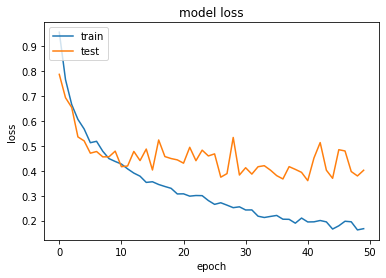

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#Saving the model

In [11]:

save_model(final_model,'final_model.h5')
final_model.save('final_model.h5')

In [12]:
test_model=load_model('final_model.h5')

#Predict Function

In [19]:
def predict(address):
    test_image=load_img(address,target_size=(224,224))
    plt.imshow(test_image)
    test_image=img_to_array(test_image)
    test_image= np.expand_dims(test_image,axis=0)

    result=test_model.predict(test_image)
    result=np.round(result)

    if result[0][0]==1:
        prediction='Cow'
    elif result[0][1] ==1:
        prediction='Elephant'
    elif result[0][2] ==1:
        prediction='Goat'  
    else: 
        prediction ='No animal present in the field'
       
    print(prediction)

Elephant


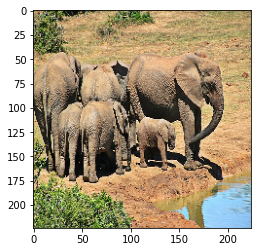

In [20]:
address ='test/elephant/9.jpeg'
predict(address)


Cow


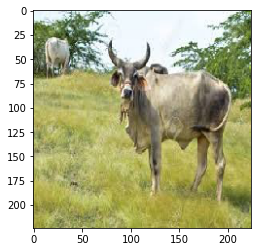

In [21]:
address ='test/cow/57.jpeg'
predict(address)


Goat


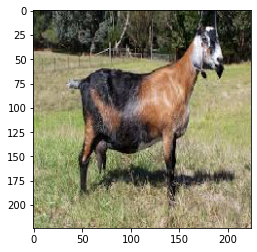

In [22]:
address ='test/goat/9.jpeg'
predict(address)